# sorting algos

implementation of a bunch of different sorting algorithms with numba including: 
- bubble sort
- insertion sort
- selection sort
- merge sort
- quick sort
- heap sort

In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define plt size
plt.rcParams['figure.figsize'] = (12, 6)

<Axes: >

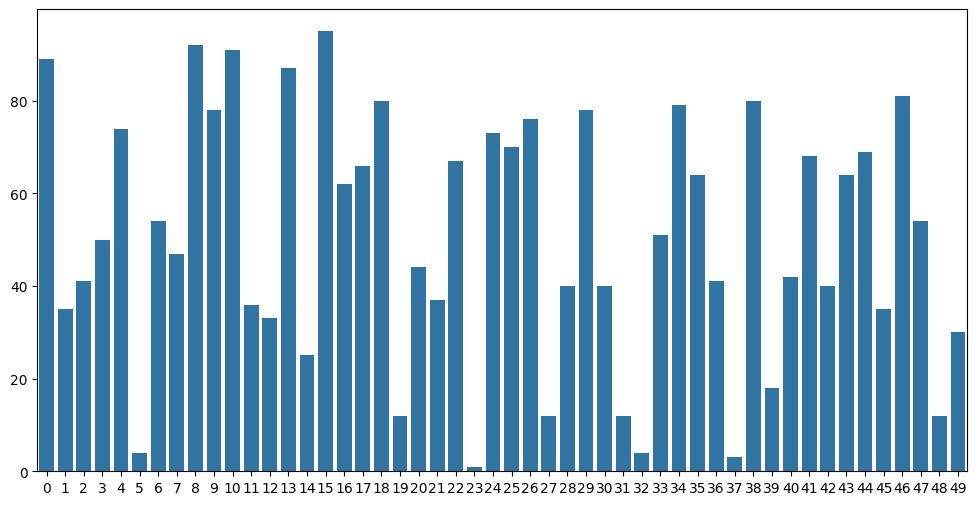

In [16]:
# create an array
X = np.random.randint(100, size=50)
sns.barplot(X)

<Axes: >

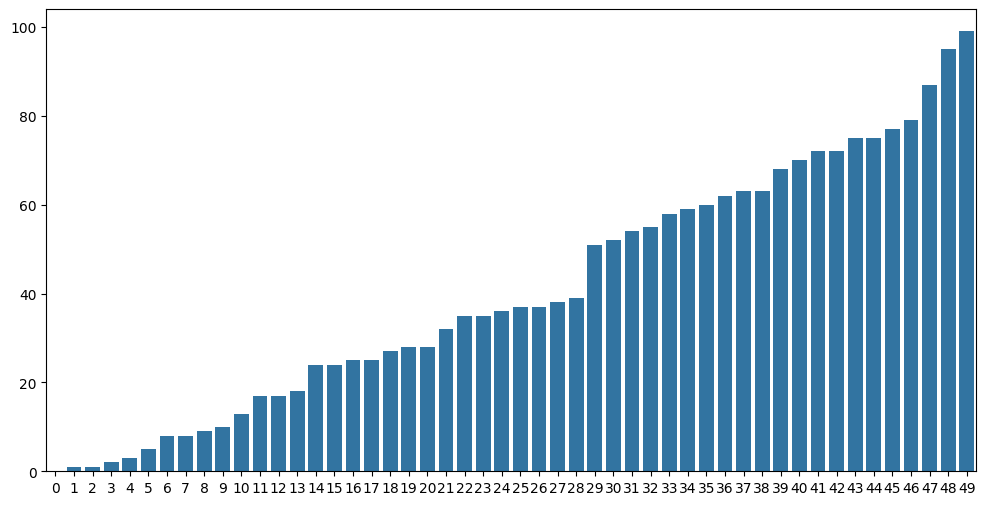

In [5]:
@nb.njit
def bubble_sort(X):
    # as long as items have been swapped, keep the loop running
    swapped = True
    
    while swapped:
        swapped = False
        
        for i in range(len(X) - 1):
            # X[i + 1] is smaller than X[i]
            # swap items
            if X[i + 1] < X[i]:
                X[i], X[i + 1] = X[i + 1], X[i]
                swapped = True
                
        
    return X

sns.barplot(bubble_sort(X))

<Axes: >

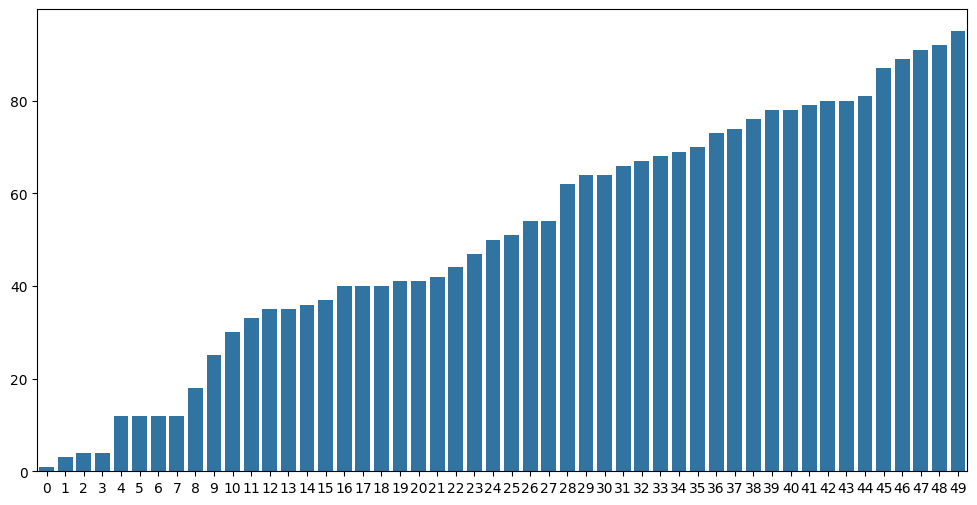

In [18]:
@nb.njit
def insertion_sort(X):
    # the first element is already "sorted"
    # have a look at X[i]
    # and insert at the matching position in already "sorted" part of array (left of i)
    for i in range(1, len(X)):
        current_element = X[i]
        
        j = i - 1
        while j >= 0 and X[j] > current_element:
            X[j + 1] = X[j]
            j = j - 1
        
        X[j + 1] = current_element
        
    return X
    
sns.barplot(insertion_sort(X))